In [61]:
import numpy as np
import pandas as pd
import math 

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.svm import LinearSVR

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.tsa.arima_model as arima
import statsmodels.tsa.holtwinters as holtwinters
from statsmodels.tsa.seasonal import seasonal_decompose

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# Load the data
file_path = r'C:\Users\Dell\Downloads\UV6154-XLS-ENG (2).xls'
df = pd.read_excel(file_path)

In [63]:
# Fill missing values in 'WEEK' column
df['WEEK'] = df['WEEK'].fillna(method='ffill')

In [64]:
df.rename(columns={' TUESDAY BOOKINGS': 'TUESDAY BOOKINGS'}, inplace=True)
df.rename(columns={' PICKUP RATIO': 'PICKUP RATIO'}, inplace=True)


In [65]:
# Convert columns to numeric types and replace the existing columns
df['PICKUP RATIO'] = pd.to_numeric(df['PICKUP RATIO'], errors='coerce')
df['DEMAND'] = pd.to_numeric(df['DEMAND'], errors='coerce')
df['TUESDAY BOOKINGS'] = pd.to_numeric(df['TUESDAY BOOKINGS'], errors='coerce')
df['DOW INDEX'] = pd.to_numeric(df['DOW INDEX'], errors='coerce')

# Drop rows with NaN values
df = df.dropna(axis=0)

# Display the last 15 rows of the DataFrame
df.tail(15)


,WEEK,DOW INDICATOR1,DEMAND,TUESDAY BOOKINGS,PICKUP RATIO,DOW INDEX
72,11,3,1753.0,1807.0,0.970116,0.972883
73,11,4,1805.0,1681.0,1.073766,1.012525
74,11,5,1601.0,1413.0,1.133050,1.067881
75,11,6,722.0,599.0,1.205342,1.122727
76,11,7,889.0,831.0,1.069795,1.048626
77,12,1,1058.0,1123.0,0.942119,0.864773
78,12,2,887.0,952.0,0.931723,0.910585
79,12,3,1676.0,1750.0,0.957714,0.972883
80,12,4,1775.0,1777.0,0.998875,1.012525
81,12,5,1759.0,1748.0,1.006293,1.067881


In [66]:
df['DAY'] = range(1, len(df) + 1)
# Display the DataFrame with the new 'DAY' column
df

,WEEK,DOW INDICATOR1,DEMAND,TUESDAY BOOKINGS,PICKUP RATIO,DOW INDEX,DAY
0,1,1,1470.0,1512.0,0.972222,0.864773,1
1,1,2,870.0,864.0,1.006944,0.910585,2
2,1,3,986.0,827.0,1.192261,0.972883,3
3,1,4,1247.0,952.0,1.309874,1.012525,4
4,1,5,1109.0,740.0,1.498649,1.067881,5
...,...,...,...,...,...,...,...
82,12,6,1093.0,932.0,1.172747,1.122727,83
83,12,7,1217.0,969.0,1.255934,1.048626,84
84,13,1,1542.0,1562.0,0.987196,0.864773,85
85,13,2,988.0,1004.0,0.984064,0.910585,86


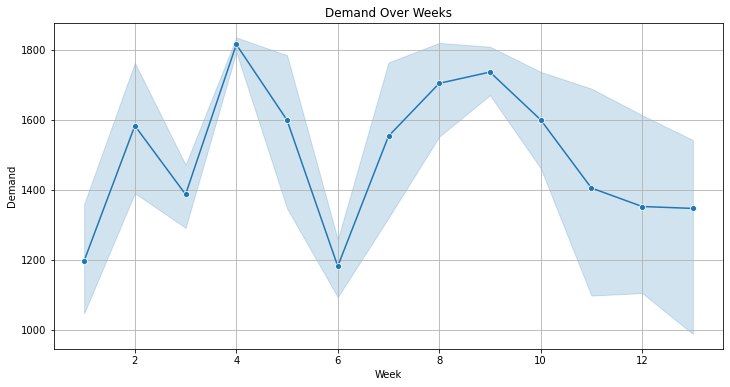

In [67]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='WEEK', y='DEMAND', data=df, marker='o')
plt.title('Demand Over Weeks')
plt.xlabel('Week')
plt.ylabel('Demand')
plt.grid(True)
plt.show()


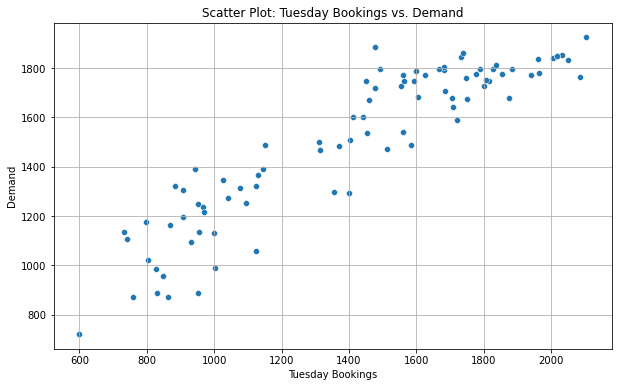

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TUESDAY BOOKINGS', y='DEMAND', data=df)
plt.title('Scatter Plot: Tuesday Bookings vs. Demand')
plt.xlabel('Tuesday Bookings')
plt.ylabel('Demand')
plt.grid(True)
plt.show()


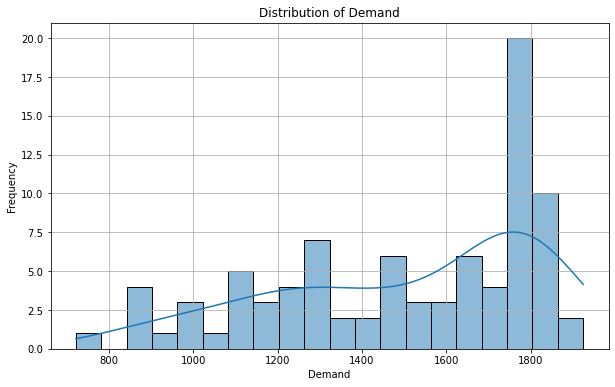

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df['DEMAND'], bins=20, kde=True)
plt.title('Distribution of Demand')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


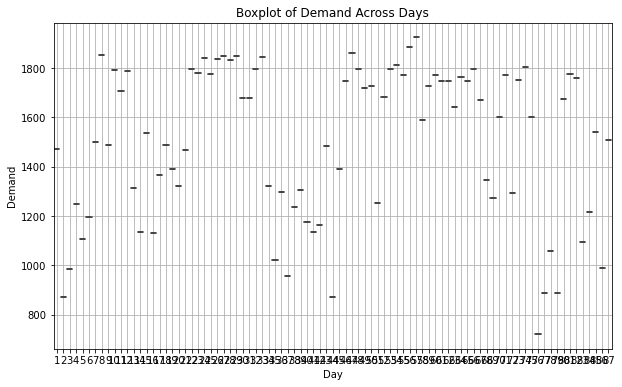

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAY', y='DEMAND', data=df)
plt.title('Boxplot of Demand Across Days')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.grid(True)
plt.show()


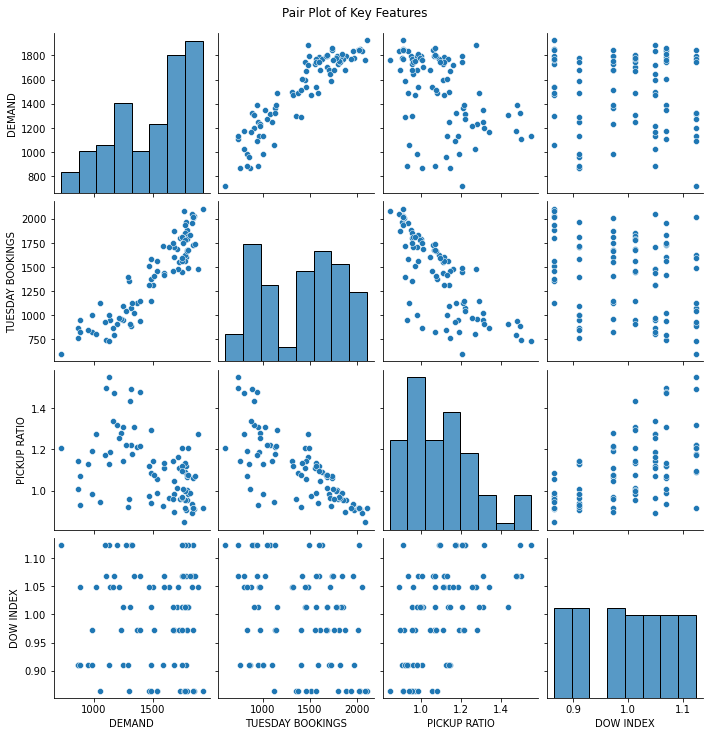

In [71]:
sns.pairplot(df[['DEMAND', 'TUESDAY BOOKINGS', 'PICKUP RATIO', 'DOW INDEX']])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


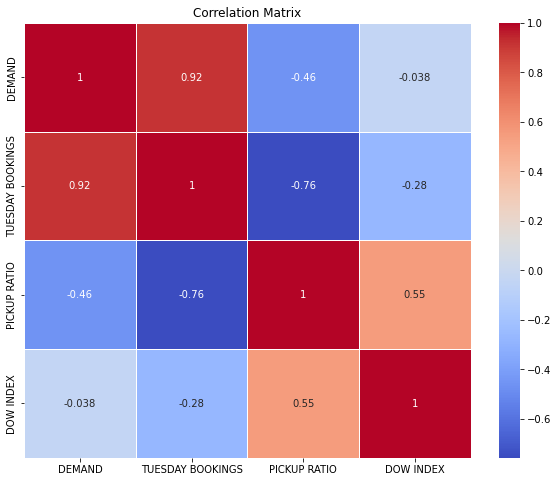

In [72]:
correlation_matrix = df[['WEEK', 'DEMAND', 'TUESDAY BOOKINGS', 'PICKUP RATIO', 'DOW INDEX']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


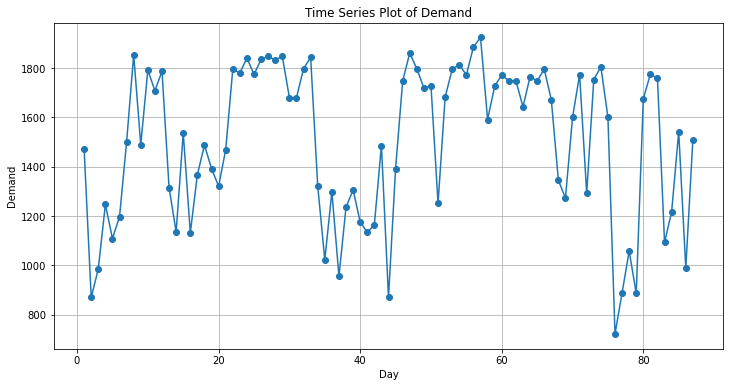

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(df['DAY'], df['DEMAND'], marker='o', linestyle='-')
plt.title('Time Series Plot of Demand')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.grid(True)
plt.show()


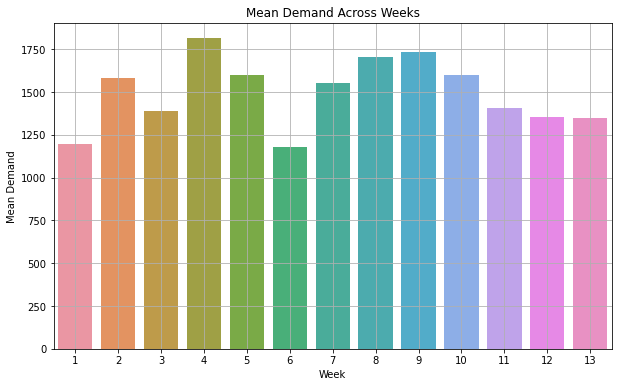

In [74]:
plt.figure(figsize=(10, 6))
mean_demand_per_week = df.groupby('WEEK')['DEMAND'].mean()
sns.barplot(x=mean_demand_per_week.index, y=mean_demand_per_week.values)
plt.title('Mean Demand Across Weeks')
plt.xlabel('Week')
plt.ylabel('Mean Demand')
plt.grid(True)
plt.show()


In [9]:
df1 = pd.concat([df['DAY'], df['DEMAND']], axis=1, keys=['DAY', 'DEMAND'])
df1.set_index('DAY', inplace=True)
df1.head(5)

,DEMAND
DAY,
1,1470.0
2,870.0
3,986.0
4,1247.0
5,1109.0


In [10]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DEMAND,87.0,1503.724138,312.914755,722.0,1262.0,1600.0,1773.5,1924.0


<AxesSubplot:xlabel='DAY'>

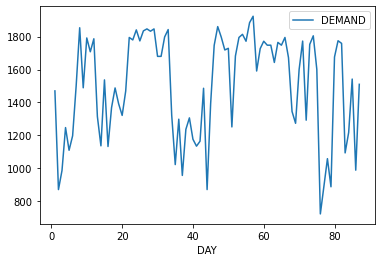

In [11]:
df1.plot()

In [12]:
time_series = df1['DEMAND']
type(time_series)

pandas.core.series.Series

<AxesSubplot:xlabel='DAY'>

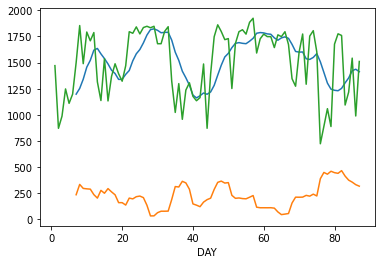

In [13]:
time_series.rolling(7).mean().plot(label = '7 days rolling mean')
time_series.rolling(7).std().plot(label = '7 days rolling std')
time_series.plot()

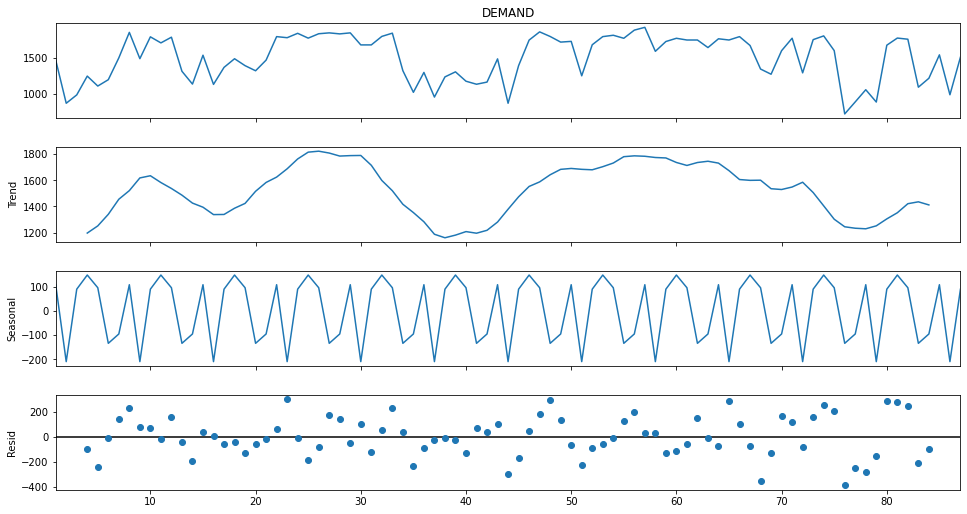

In [14]:
decomp = seasonal_decompose(time_series, period=7)
fig = decomp.plot()
fig.set_size_inches(15,8)

In [15]:
# Creating the training set and dropping the validation data
df_val = df.drop(df.index[77:])
df_val.tail(5)

,WEEK,DOW INDICATOR1,DEMAND,TUESDAY BOOKINGS,PICKUP RATIO,DOW INDEX,DAY
72,11,3,1753.0,1807.0,0.970116,0.972883,73
73,11,4,1805.0,1681.0,1.073766,1.012525,74
74,11,5,1601.0,1413.0,1.133050,1.067881,75
75,11,6,722.0,599.0,1.205342,1.122727,76
76,11,7,889.0,831.0,1.069795,1.048626,77


Linear Regression

In [16]:
X_val = df_val[['TUESDAY BOOKINGS']]
y_val = df_val.DEMAND

lin_reg_val = linear_model.LinearRegression()
lin_reg_val.fit(X_val, y_val)

print("The R^2 score for the linear regression is %f" % lin_reg_val.score(X_val, y_val)) 

print ("The regression coefficient is %f" % lin_reg_val.coef_) 
print ("The regression intercept is %f" % lin_reg_val.intercept_)

The R^2 score for the linear regression is 0.841096
The regression coefficient is 0.671358
The regression intercept is 568.036709


In [17]:
#Predict week 12-13 using the tuesdy bookings data
pred_lin_reg_val = lin_reg_val.predict([[1123], [952], [1750], [1777],[1748],[932],[969],[1562],[1004],[1404]])
pred_lin_reg_val

array([1321.97182457, 1207.16959412, 1742.91333623, 1761.04000419,
       1741.57062008, 1193.74243266, 1218.58268135, 1616.69801854,
       1242.0802139 , 1510.62344303])

In [18]:
expected = [1058,887, 1676,1775,1759,1093,1217,1542,988,1510]

In [19]:
mae_lin_reg_val = mean_absolute_error(expected, pred_lin_reg_val)
print('MAE for linear regression is %f' % mae_lin_reg_val)
mse_lin_reg_val = mean_squared_error(expected, pred_lin_reg_val)
print('MSE for linear regression is %f' % mse_lin_reg_val)
rmse_lin_reg_val = math.sqrt(mse_lin_reg_val)
print('RMSE for linear regression is %f' % rmse_lin_reg_val)

MAE for linear regression is 111.417092
MSE for linear regression is 25745.423287
RMSE for linear regression is 160.453804


Arima

In [20]:
from statsmodels.tsa.arima.model import ARIMA as arima_model
import math

In [21]:
df1_val = pd.concat([df_val['DAY'], df_val['DEMAND']], axis=1, keys=['DAY', 'DEMAND'])
df1_val.set_index('DAY', inplace=True)
df1_val.head(5)

,DEMAND
DAY,
1,1470.0
2,870.0
3,986.0
4,1247.0
5,1109.0


In [22]:
df1_val['DEMAND'] = pd.to_numeric(df1_val['DEMAND'], errors='coerce')

In [23]:
# Use ARIMA model
arima_val = arima_model(df1_val['DEMAND'], order=(6, 1, 1))
arima_val_fit = arima_val.fit()

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
# Forecast steps into the future
forecast_steps = 10
pred_arima_val = arima_val_fit.get_forecast(steps=forecast_steps).predicted_mean

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [25]:
expected = [1058, 887, 1676, 1775, 1759, 1093, 1217, 1542, 988, 1510]

In [26]:
# Print the predicted values
print('Predicted values:')
print(pred_arima_val)
# Print the expected values
print('Expected values:')
print(expected)

Predicted values:
77    1246.314467
78     846.682542
79    1070.678868
80    1195.225385
81    1461.290874
82    1006.897839
83    1148.106408
84    1299.372386
85    1068.246440
86    1096.709099
Name: predicted_mean, dtype: float64
Expected values:
[1058, 887, 1676, 1775, 1759, 1093, 1217, 1542, 988, 1510]


In [27]:
# Calculate evaluation metrics
mae_arima_val = mean_absolute_error(expected, pred_arima_val)
print('MAE for ARIMA is %f' % mae_arima_val)
mse_arima_val = mean_squared_error(expected, pred_arima_val)
print('MSE for ARIMA is %f' % mse_arima_val)
rmse_arima_val = math.sqrt(mse_arima_val)
print('RMSE for ARIMA is %f' % rmse_arima_val)

MAE for ARIMA is 260.259750
MSE for ARIMA is 107654.776371
RMSE for ARIMA is 328.107873


In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_val = RandomForestRegressor()
rf_val.fit(X_val, y_val)

pred_rf_val = rf_val.predict([[1123], [952], [1750], [1777],[1748],[932],[969],[1562],[1004],[1404]])
mae_rf_val = mean_absolute_error(expected, pred_rf_val)
mse_rf_val = mean_squared_error(expected, pred_rf_val)
rmse_rf_val = math.sqrt(mse_rf_val)

print('Random Forest:')
print('MAE: %f' % mae_rf_val)
print('MSE: %f' % mse_rf_val)
print('RMSE: %f' % rmse_rf_val)
print()

Random Forest:
MAE: 165.704000
MSE: 39642.446120
RMSE: 199.104109



In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gb_val = GradientBoostingRegressor()
gb_val.fit(X_val, y_val)

pred_gb_val = gb_val.predict([[1123], [952], [1750], [1777],[1748],[932],[969],[1562],[1004],[1404]])

mae_gb_val = mean_absolute_error(expected, pred_gb_val)
mse_gb_val = mean_squared_error(expected, pred_gb_val)
rmse_gb_val = math.sqrt(mse_gb_val)

print('Gradient Boosting:')
print('MAE: %f' % mae_gb_val)
print('MSE: %f' % mse_gb_val)
print('RMSE: %f' % rmse_gb_val)
print()


Gradient Boosting:
MAE: 165.047281
MSE: 38462.326125
RMSE: 196.118143



In [36]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)

svr_val = SVR()
svr_val.fit(X_val_scaled, y_val)

pred_svr_val = svr_val.predict(scaler.transform([[1123], [952], [1750], [1777],[1748],[932],[969],[1562],[1004],[1404]]))

mae_svr_val = mean_absolute_error(expected, pred_svr_val)
mse_svr_val = mean_squared_error(expected, pred_svr_val)
rmse_svr_val = math.sqrt(mse_svr_val)

print('SVR:')
print('MAE: %f' % mae_svr_val)
print('MSE: %f' % mse_svr_val)
print('RMSE: %f' % rmse_svr_val)


SVR:
MAE: 321.883440
MSE: 161289.635763
RMSE: 401.608809


In [46]:
holtwinters_val = holtwinters.ExponentialSmoothing(df1_val['DEMAND'], seasonal_periods=7)
holtwinters_val = holtwinters.ExponentialSmoothing(df1_val['DEMAND'])
holtwinters_val_fit = holtwinters_val.fit()

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [47]:
pred_holtwinters_val = np.array(holtwinters_val_fit.forecast(steps =10))
pred_holtwinters_val

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


array([918.00088717, 918.00088717, 918.00088717, 918.00088717,
       918.00088717, 918.00088717, 918.00088717, 918.00088717,
       918.00088717, 918.00088717])

In [49]:
expected = [1058,887, 1676,1775,1759,1093,1217,1542,988,1510]

mae_holtwinters_val = mean_absolute_error (expected, pred_holtwinters_val)
mse_holtwinters_val = mean_squared_error(expected, pred_holtwinters_val)
rmse_holtwinters_val = math.sqrt(mse_holtwinters_val)
print('MAE for Holt Winters is %f' % mae_holtwinters_val)
print('MSE for Holt Winters is %f' % mse_holtwinters_val)
print('RMSE for Holt Winters is %f' % rmse_holtwinters_val)

MAE for Holt Winters is 438.699290
MSE for Holt Winters is 290161.332600
RMSE for Holt Winters is 538.666253


In [50]:
import pandas as pd
import seaborn as sns
from tabulate import tabulate

# Results
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting',  'SVR', 'ARIMA', 'Holt Wnters'],
    'MAE': [mae_lin_reg_val, mae_rf_val, mae_gb_val,  mae_svr_val, mae_arima_val, mae_holtwinters_val],
    'MSE': [mse_lin_reg_val, mse_rf_val, mse_gb_val,  mse_svr_val, mse_arima_val, mse_holtwinters_val],
    'RMSE': [rmse_lin_reg_val, rmse_rf_val, rmse_gb_val, rmse_svr_val, rmse_arima_val, rmse_holtwinters_val],
}

# Create DataFrame
df_results = pd.DataFrame(results)

# Sort by RMSE in descending order (lower is better)
df_results_sorted = df_results.sort_values(by='RMSE', ascending=True)

# Color grading
cm = sns.light_palette("seagreen", as_cmap=True)

# Highlight the minimum value in each column
df_styled = df_results_sorted.style.background_gradient(cmap=cm, subset=['MAE', 'MSE', 'RMSE'])

# Display the table
print(tabulate(df_styled.data, headers='keys', tablefmt='github', showindex=False))


| Model             |     MAE |      MSE |    RMSE |
|-------------------|---------|----------|---------|
| Linear Regression | 111.417 |  25745.4 | 160.454 |
| Gradient Boosting | 165.047 |  38462.3 | 196.118 |
| Random Forest     | 165.704 |  39642.4 | 199.104 |
| ARIMA             | 260.26  | 107655   | 328.108 |
| SVR               | 321.883 | 161290   | 401.609 |
| Holt Wnters       | 438.699 | 290161   | 538.666 |


In [51]:
aic_arima_val = arima_val_fit.aic
print('AIC for ARIMA: %f' % aic_arima_val)

AIC for ARIMA: 1049.569317


In [52]:
# Tuesday bookings for prediction
tuesday_bookings_to_predict = [[1657], [1643], [1124], [1074], [1839], [1862], [1886], [1696], [1002], [794], [1106]]

# Predict demand using the linear regression model
predicted_demand = lin_reg_val.predict(tuesday_bookings_to_predict)

# Display the predicted demand
print("Predicted Demand:")
print(predicted_demand)


Predicted Demand:
[1680.47703545 1671.07802244 1322.64318264 1289.075279   1802.66420471
 1818.10544038 1834.21803413 1706.66000029 1240.73749776 1101.09501861
 1310.55873733]


In [59]:
# Tuesday bookings for prediction
tuesday_bookings_to_predict = np.array([[1657], [1643], [1124], [1074], [1839], [1862], [1886], [1696], [1002], [794], [1106]])

# Predict demand using the linear regression model
predicted_demand = lin_reg_val.predict(tuesday_bookings_to_predict)

# Round Predicted Demand to the nearest whole number
rounded_predicted_demand = np.round(predicted_demand).astype(int)

# Create a DataFrame with 'Predicted_Demand' (rounded) and 'Bookings' columns
predicted_demand_df = pd.DataFrame({
    'Predicted_Demand': rounded_predicted_demand.flatten(),
    'Bookings': np.array(tuesday_bookings_to_predict).flatten()
})

# Display the DataFrame
print(predicted_demand_df)

    Predicted_Demand  Bookings
0               1680      1657
1               1671      1643
2               1323      1124
3               1289      1074
4               1803      1839
5               1818      1862
6               1834      1886
7               1707      1696
8               1241      1002
9               1101       794
10              1311      1106


In [60]:
import pandas as pd

# Tuesday bookings for prediction
tuesday_bookings_to_predict = np.array([[1657], [1643], [1124], [1074], [1839], [1862], [1886], [1696], [1002], [794], [1106]])

# Predict demand using the linear regression model
predicted_demand = lin_reg_val.predict(tuesday_bookings_to_predict)

# Round Predicted Demand to the nearest whole number
rounded_predicted_demand = np.round(predicted_demand).astype(int)

# Calculate Predicted Pickup Ratio
predicted_pickup_ratio = rounded_predicted_demand / np.array(tuesday_bookings_to_predict).flatten()

# Create a DataFrame with 'Predicted_Demand', 'Bookings', and 'Predicted_Pickup_Ratio' columns
predicted_demand_df = pd.DataFrame({
    'Predicted_Demand': rounded_predicted_demand.flatten(),
    'Bookings': np.array(tuesday_bookings_to_predict).flatten(),
    'Predicted_Pickup_Ratio': predicted_pickup_ratio
})

# Display the DataFrame
print(predicted_demand_df)


    Predicted_Demand  Bookings  Predicted_Pickup_Ratio
0               1680      1657                1.013881
1               1671      1643                1.017042
2               1323      1124                1.177046
3               1289      1074                1.200186
4               1803      1839                0.980424
5               1818      1862                0.976369
6               1834      1886                0.972428
7               1707      1696                1.006486
8               1241      1002                1.238523
9               1101       794                1.386650
10              1311      1106                1.185353
